# Mateusz Strojek, Bartłomiej Sadza
### IiE I rok stacjonarne

## Machine Learning ćwiczenia 6

In [66]:
import pandas as pd
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [23]:
df_air_all = pd.read_csv("zad3_Airline.csv", delimiter=";")
data = df_air_all.copy()

data.head() 

,satisfaction,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,...,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes
0,satisfied,Female,Loyal Customer,20.0,Personal Travel,Eco,3009,0,1,0,...,3,4,1,2,3,1,4,4,0,0.0
1,satisfied,Female,Loyal Customer,48.0,Personal Travel,Eco,1449,0,1,0,...,2,2,2,1,2,4,2,2,0,2.0
2,satisfied,Male,NaN,NaN,Personal Travel,Eco,2840,0,1,0,...,4,4,2,4,2,4,3,4,0,0.0
3,satisfied,Male,Loyal Customer,13.0,Personal Travel,Eco,2306,0,1,0,...,3,4,4,2,3,2,2,4,0,0.0
4,satisfied,Male,Loyal Customer,34.0,Personal Travel,Eco,1952,0,1,0,...,2,2,3,4,4,4,4,2,10,0.0


### Proces przygotowywania danych do wykonania zadania

In [25]:
data.isnull().sum()
cate_na = ['Customer.Type']

for column in cate_na: 
    data[column] = data[column].fillna(data[column].mode()[0])

In [27]:
data_dropped = data.dropna()

data_dropped.isnull().sum()
data_dropped.head()

,satisfaction,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,...,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes
0,satisfied,Female,Loyal Customer,20.0,Personal Travel,Eco,3009,0,1,0,...,3,4,1,2,3,1,4,4,0,0.0
1,satisfied,Female,Loyal Customer,48.0,Personal Travel,Eco,1449,0,1,0,...,2,2,2,1,2,4,2,2,0,2.0
3,satisfied,Male,Loyal Customer,13.0,Personal Travel,Eco,2306,0,1,0,...,3,4,4,2,3,2,2,4,0,0.0
4,satisfied,Male,Loyal Customer,34.0,Personal Travel,Eco,1952,0,1,0,...,2,2,3,4,4,4,4,2,10,0.0
5,satisfied,Male,Loyal Customer,70.0,Personal Travel,Eco,1650,0,1,0,...,4,4,1,4,4,4,4,4,19,45.0


In [ ]:
num_na_air = ["Age", "Arrival.Delay.in.Minutes"]

data = data_dropped.copy()

for column in num_na_air:
    data[column] = data[column].fillna(data[column].mean())

data.satisfaction = data.satisfaction.map({"satisfied" : 1, "dissatisfied" : 0})
data["Customer.Type"] = data["Customer.Type"].map({"Loyal Customer" : 1, "disloyal Customer" : 0})
data.Gender = data.Gender.map({"Male" : 1, "Female" : 0})
data["Type.of.Travel"] = data["Type.of.Travel"].map({"Business travel" : 1, "Personal Travel" : 0})
data.Class = data.Class.map({"Eco" : 0, "Eco Plus" : 1, "Business" : 2})

## 1. Wykorzystać algorytm SVM do predykcji wartości zmiennej wynikowej.

In [63]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(data.drop('satisfaction', axis=1)), columns=data.drop('satisfaction',axis=1).columns)
y = data['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### a) Zbudować model wykorzystujący jądro liniowe (linear). Przedstawić hiperparametry, które można optymalizować przy jądrze liniowym (wyjaśnić za co odpowiadają). Zweryfikować jak zmiana tych hiperparametrów wpływa na uzyskiwane wyniki.

#### Parametr C - Wyższa wartość C oznacza, że model będzie bardziej karany za każdy błąd klasyfikacji, co skutkuje bardziej dopasowanym modelem. Jest to parametr odpowiedzialny za parametryzację. Występuje we wszystkich rodzajach SVM.

In [166]:
param_grid = [0.01, 0.05, 0.1, 0.25, 0.5, 1, 2, 5]
wyniki = []

for C in param_grid:
    model = SVC(C=C, kernel='linear', random_state=1)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    wyniki.append({
        'C': model.C,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test)
    })

df = pd.DataFrame(wyniki)

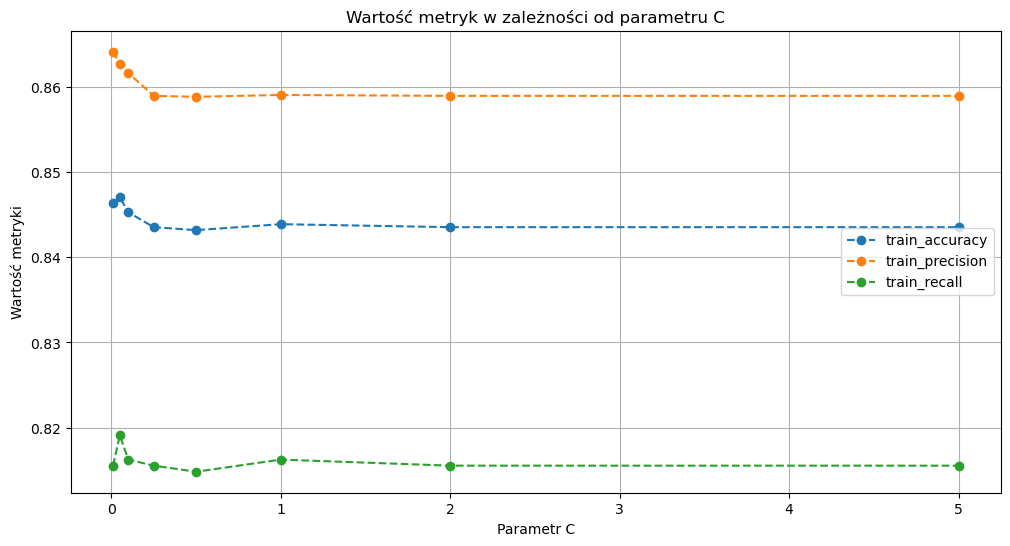

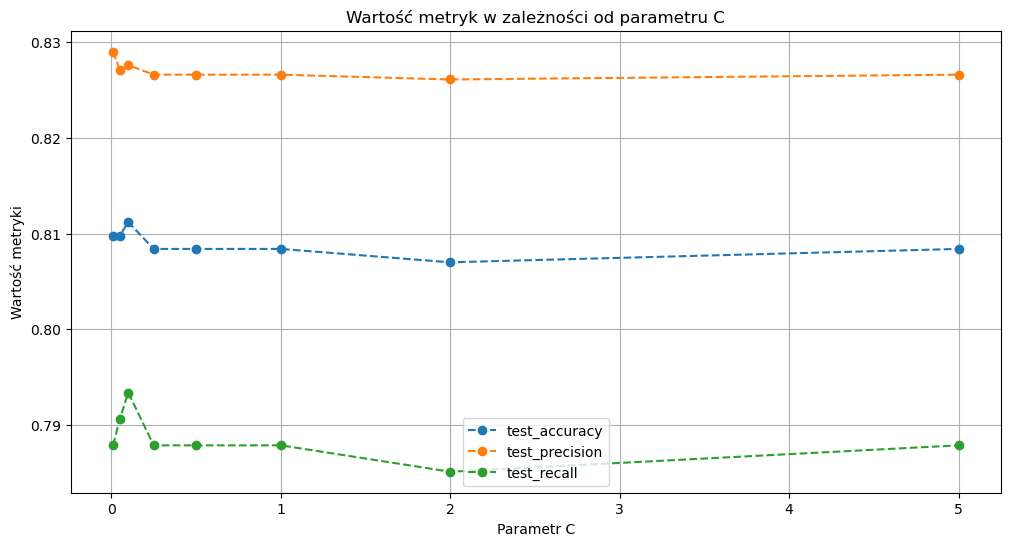

In [168]:
train = ["train_accuracy", "train_precision", "train_recall"]
test = ["test_accuracy", "test_precision", "test_recall"]

fig, ax = plt.subplots(figsize=(12, 6))
for col in train:
    ax.plot(param_grid, df[col], label = col, marker="o", linestyle="--")

ax.legend()
ax.set_title("Wartość metryk w zależności od parametru C")
ax.set_xlabel("Parametr C")
ax.set_ylabel("Wartość metryki")
ax.grid(True)
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))
for col in test:
    ax.plot(df["C"], df[col], label = col, marker="o", linestyle="--")

ax.legend()
ax.set_title("Wartość metryk w zależności od parametru C")
ax.set_xlabel("Parametr C")
ax.set_ylabel("Wartość metryki")
ax.grid(True)
plt.show()

#### Wniosek: Parametr C nie wpływa bardzo na jokość modelu. Najlepsza dokładność dla zbioru treningowego była dla C = 0.05, natomiast dla zbioru testowego dla C = 0.1

#### Shrinking - shrinking polega na dynamicznym wykluczaniu próbek, które aktualnie nie są istotne dla optymalizacji (czyli tych, które najprawdopodobniej nie wpłyną na margines SVM w obecnej iteracji).

In [189]:
wyniki = []

for shr in [True, False]:
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        model = SVC(C=0.05, kernel='linear', shrinking=True, random_state=1)
        model.fit(X_train, y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        wyniki.append({
            'shrinking': shr,
            'train_accuracy': accuracy_score(y_train, y_pred_train),
            'test_accuracy': accuracy_score(y_test, y_pred_test),
            'train_recall': recall_score(y_train, y_pred_train),
            'test_recall': recall_score(y_test, y_pred_test),
            'train_precision': precision_score(y_train, y_pred_train),
            'test_precision': precision_score(y_test, y_pred_test)
        })

df = pd.DataFrame(wyniki)

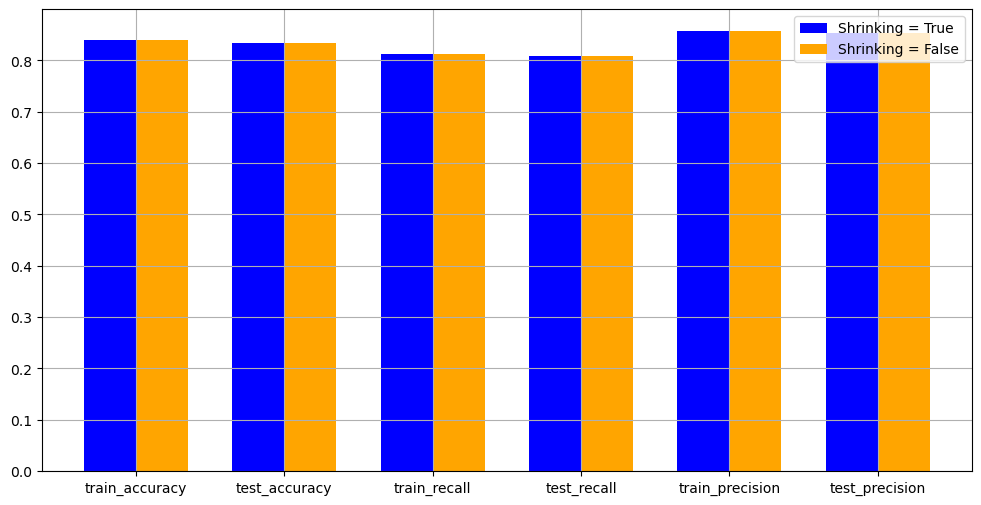

In [245]:
sr_t = df[df['shrinking']==True].mean()[1:]
sr_f = df[df['shrinking']==False].mean()[1:]

x = np.arange(len(df.columns[1:]))  # Pozycje słupków na osi X
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35

ax.bar(x - bar_width / 2, sr_t, width=bar_width, color='blue', label="Shrinking = True")
ax.bar(x + bar_width / 2, sr_f, width=bar_width, color='orange', label="Shrinking = False")
ax.set_xticks(x)
ax.set_xticklabels(df.columns[1:])

ax.legend()
ax.grid(True)

plt.show()

#### Wniosek: Parametr shrinking nie wpływa na jakość modelu

#### Występują jeszcze parametry dla wszystkich rodzajów kerneli, takie jak:
- tol - reprezentuje minimalną zmianę funkcji celu w trakcie iteracyjnego procesu optymalizacji. Jeśli zmiana wartości funkcji celu spadnie poniżej tego progu, proces optymalizacji kończy się.
- max_iter - określa maksymalną liczbę iteracji, jakie algorytm może wykonać podczas procesu optymalizacji.
#### Jest to logiczne, że jeśli zmniejszymy maksymalną liczbę iteracji, bądź też zwiększymy minimalną zmianę funkcji celu aby zatrzymać algorytm, to jakość modelu straci na wartości.

## b) Zbudować model wykorzystujący jądro wielomianowe (poly). Przedstawić hiperparametry, które można optymalizować przy tym jądrze (wyjaśnić za co odpowiadają). Zweryfikować jak zmiana tych hiperparametrów wpływa na uzyskiwane wyniki.

#### Parametr C

In [262]:
param_grid = [0.01, 0.05, 0.1, 0.25, 0.5, 1, 2, 5, 10, 50]
wyniki = []

for C in param_grid:
    model = SVC(C=C, kernel='poly', random_state=1)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    wyniki.append({
        'C': model.C,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test)
    })

df = pd.DataFrame(wyniki)

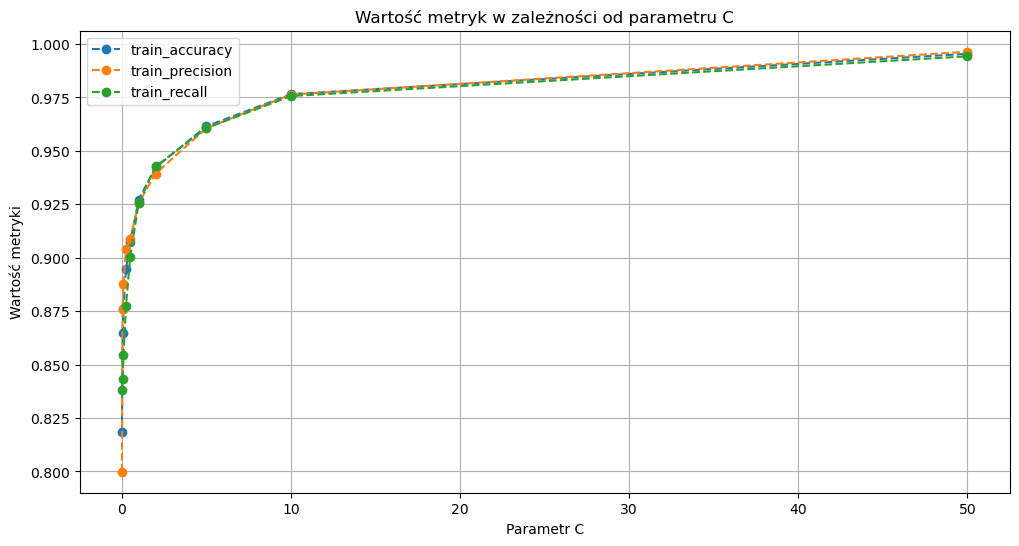

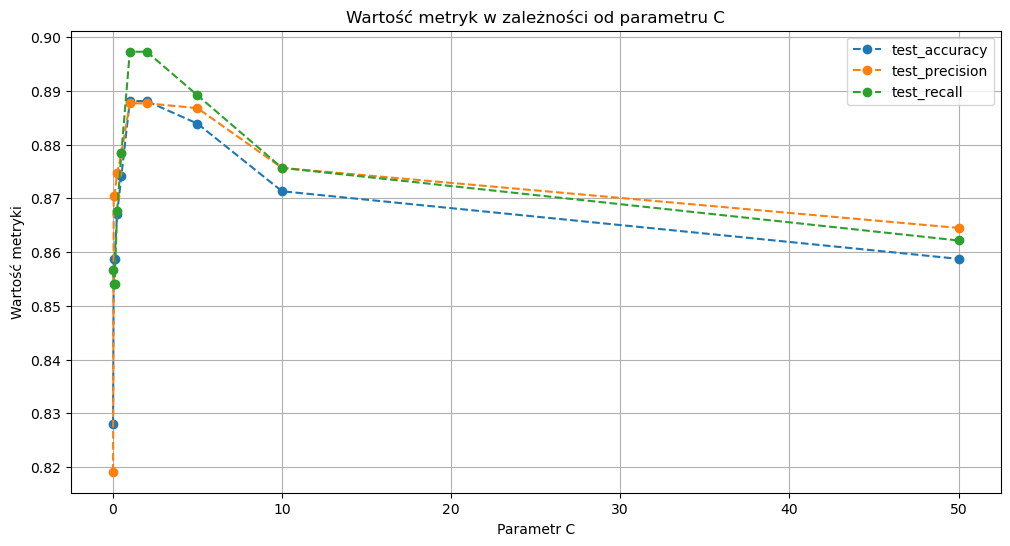

In [264]:
train = ["train_accuracy", "train_precision", "train_recall"]
test = ["test_accuracy", "test_precision", "test_recall"]

fig, ax = plt.subplots(figsize=(12, 6))
for col in train:
    ax.plot(param_grid, df[col], label = col, marker="o", linestyle="--")

ax.legend()
ax.set_title("Wartość metryk w zależności od parametru C")
ax.set_xlabel("Parametr C")
ax.set_ylabel("Wartość metryki")
ax.grid(True)
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))
for col in test:
    ax.plot(df["C"], df[col], label = col, marker="o", linestyle="--")

ax.legend()
ax.set_title("Wartość metryk w zależności od parametru C")
ax.set_xlabel("Parametr C")
ax.set_ylabel("Wartość metryki")
ax.grid(True)
plt.show()

#### Wniosek: Im większe C, tym lepsze wyniki dla zbioru treningowego, ponieważ model bardzo mocno dopasowuje się do danych, natomiast dla zbioru testowego można zauważyć, że przy **C=1** wyniki są najlepsze, po czym wartość metryk zaczyna spadać z powodu przeuczenia modelu.

#### Shrinking

In [271]:
wyniki = []

for shr in [True, False]:
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        model = SVC(C=1, kernel='poly', shrinking=True, random_state=1)
        model.fit(X_train, y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        wyniki.append({
            'shrinking': shr,
            'train_accuracy': accuracy_score(y_train, y_pred_train),
            'test_accuracy': accuracy_score(y_test, y_pred_test),
            'train_recall': recall_score(y_train, y_pred_train),
            'test_recall': recall_score(y_test, y_pred_test),
            'train_precision': precision_score(y_train, y_pred_train),
            'test_precision': precision_score(y_test, y_pred_test)
        })

df = pd.DataFrame(wyniki)

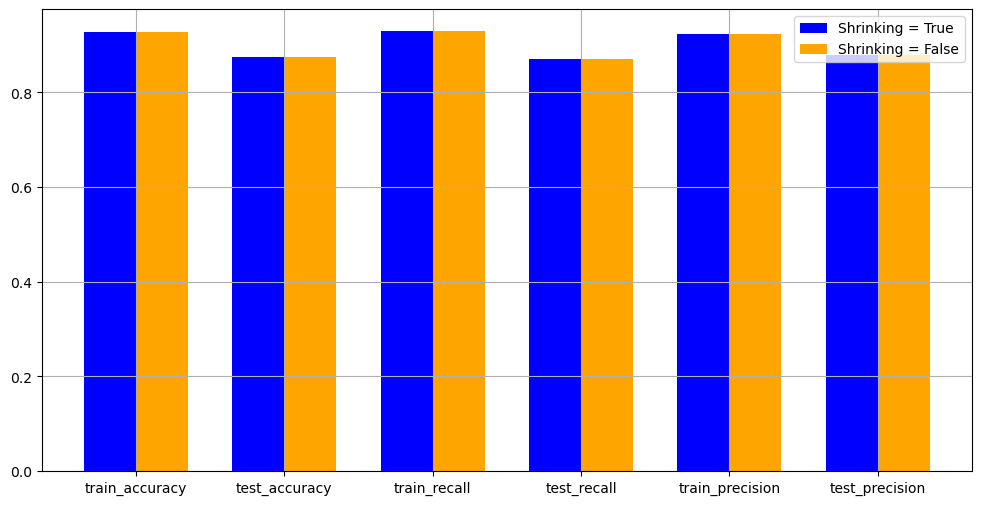

In [273]:
sr_t = df[df['shrinking']==True].mean()[1:]
sr_f = df[df['shrinking']==False].mean()[1:]

x = np.arange(len(df.columns[1:]))  # Pozycje słupków na osi X
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35

ax.bar(x - bar_width / 2, sr_t, width=bar_width, color='blue', label="Shrinking = True")
ax.bar(x + bar_width / 2, sr_f, width=bar_width, color='orange', label="Shrinking = False")
ax.set_xticks(x)
ax.set_xticklabels(df.columns[1:])

ax.legend()
ax.grid(True)

plt.show()

#### Wniosek: Parametr shrinking nic nie zmienia

#### Degree - stopień wielomianu

In [286]:
param_grid = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
wyniki = []

for deg in param_grid:
    model = SVC(C=1, kernel='poly', degree=deg, random_state=2)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    wyniki.append({
        'C': deg,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test)
    })

df = pd.DataFrame(wyniki)

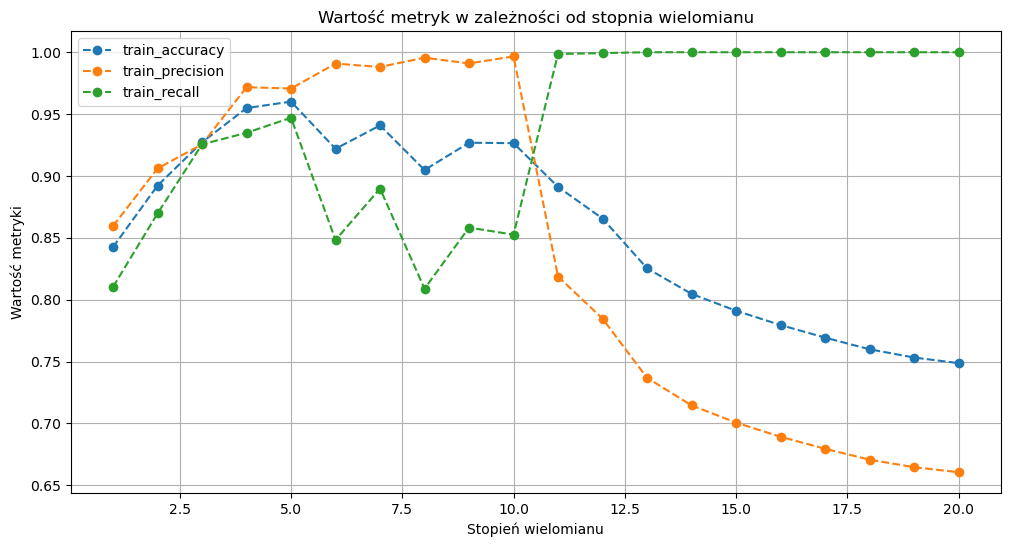

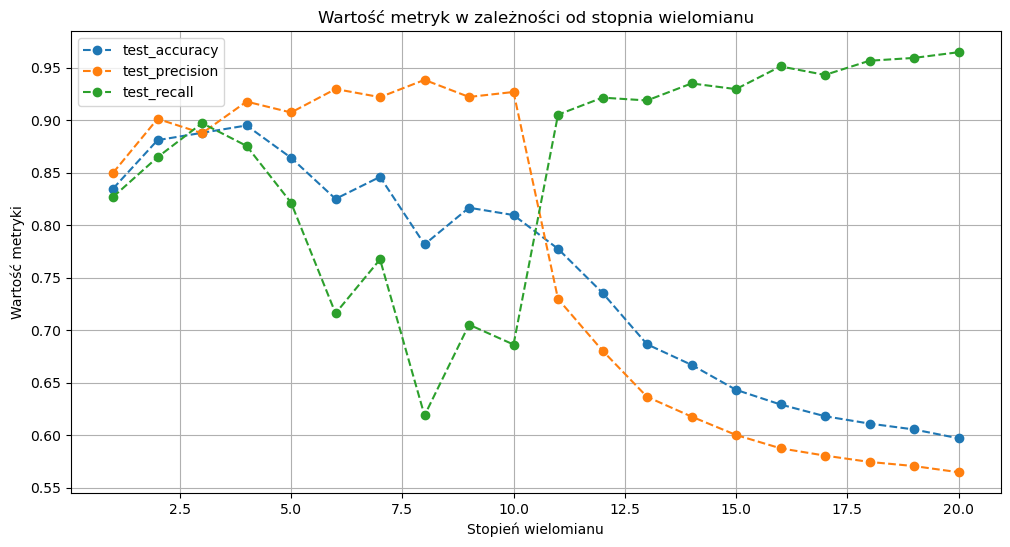

In [288]:
train = ["train_accuracy", "train_precision", "train_recall"]
test = ["test_accuracy", "test_precision", "test_recall"]

fig, ax = plt.subplots(figsize=(12, 6))
for col in train:
    ax.plot(param_grid, df[col], label = col, marker="o", linestyle="--")

ax.legend()
ax.set_title("Wartość metryk w zależności od stopnia wielomianu")
ax.set_xlabel("Stopień wielomianu")
ax.set_ylabel("Wartość metryki")
ax.grid(True)
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))
for col in test:
    ax.plot(param_grid, df[col], label = col, marker="o", linestyle="--")

ax.legend()
ax.set_title("Wartość metryk w zależności od stopnia wielomianu")
ax.set_xlabel("Stopień wielomianu")
ax.set_ylabel("Wartość metryki")
ax.grid(True)
plt.show()

#### Wniosek: najlepsza dokładność dla zbioru treningowego była dla degree = 5, natomiast dla zbioru testowego dla degree = 4. Warto zauważyć, że od pewnego momentu w obydwu przypadkach precyzja spada, natomiast czułość drastycznie rośnie.

#### Gamma - kontroluje, jak daleko wpływ jednej próbki treningowej rozciąga się w przestrzeni decyzyjnej.

In [336]:
param_grid = range(1, 200, 5)
wyniki = []

for gamma in param_grid:
    model = SVC(C=1, kernel='poly', degree=4, gamma = gamma*0.001, random_state=2)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    wyniki.append({
        'gamma': gamma,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test)
    })

df = pd.DataFrame(wyniki)

C:\Users\matti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


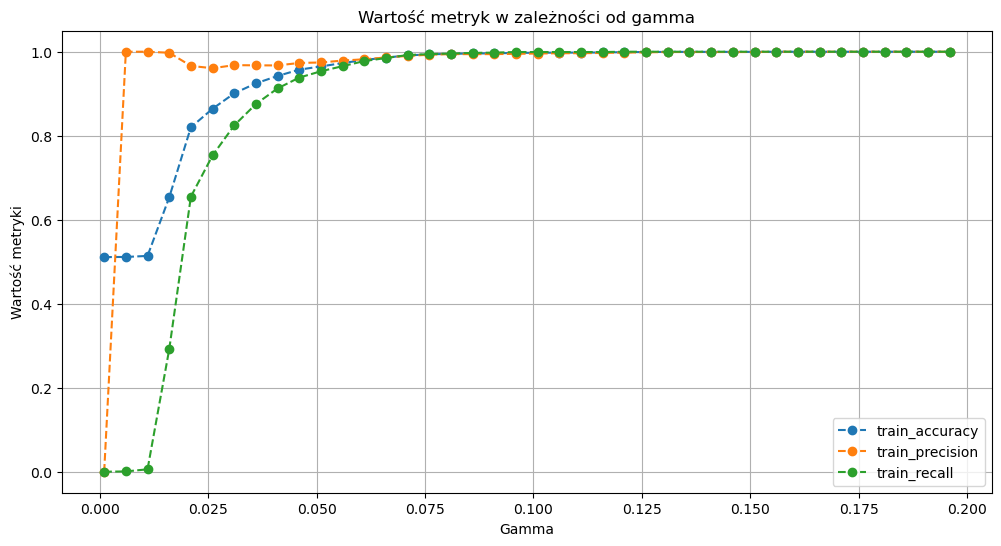

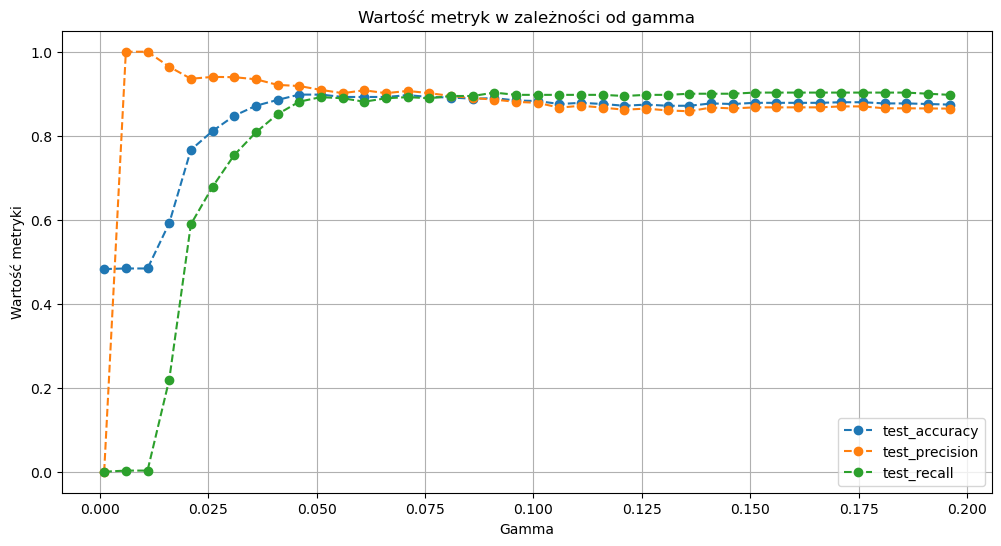

In [338]:
train = ["train_accuracy", "train_precision", "train_recall"]
test = ["test_accuracy", "test_precision", "test_recall"]

param_grid = list(param_grid)

fig, ax = plt.subplots(figsize=(12, 6))
for col in train:
    ax.plot(np.arange(0.001, 0.200, 0.005), df[col], label = col, marker="o", linestyle="--")

ax.legend()
ax.set_title("Wartość metryk w zależności od gamma")
ax.set_xlabel("Gamma")
ax.set_ylabel("Wartość metryki")
ax.grid(True)
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))
for col in test:
    ax.plot(np.arange(0.001, 0.200, 0.005), df[col], label = col, marker="o", linestyle="--")

ax.legend()
ax.set_title("Wartość metryk w zależności od gamma")
ax.set_xlabel("Gamma")
ax.set_ylabel("Wartość metryki")
ax.grid(True)
plt.show()

#### Wniosek: Dla niskiej wartości gamma, dokładność jest mała. Przy wartości 0,05, wartość metryk dla zbioru testowego stabilizuje, natomiast dla zbioru treningowego widać zależność, że im większa gamma, tym lepsze dopasowanie. W takim razie można wysnuć wniosek, że możliwa jest opcja przeuczenia modelu, gdy ustawimy gamma za wysokie.

## c) Zbudować model wykorzystujący jądro radialne (rbf - radial basis function). Przedstawić hiperparametry, które można optymalizować przy tym jądrze (wyjaśnić za co odpowiadają). Zweryfikować jak zmiana tych hiperparametrów wpływa na uzyskiwane wyniki.

In [346]:
param_grid = [0.01, 0.05, 0.1, 0.25, 0.5, 1, 2, 5, 10]
wyniki = []

for C in param_grid:
    model = SVC(C=C, kernel='rbf', random_state=1)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    wyniki.append({
        'C': model.C,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test)
    })

df = pd.DataFrame(wyniki)

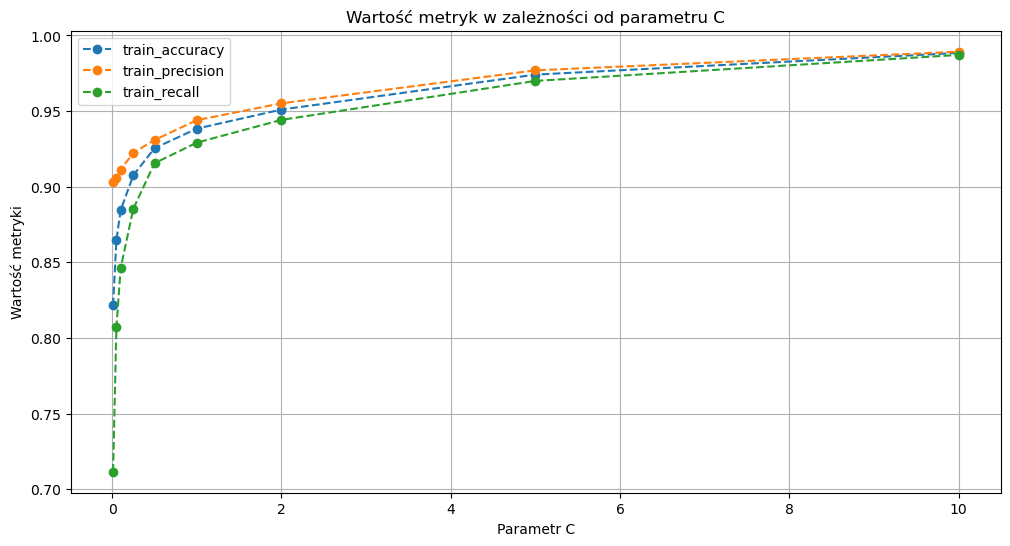

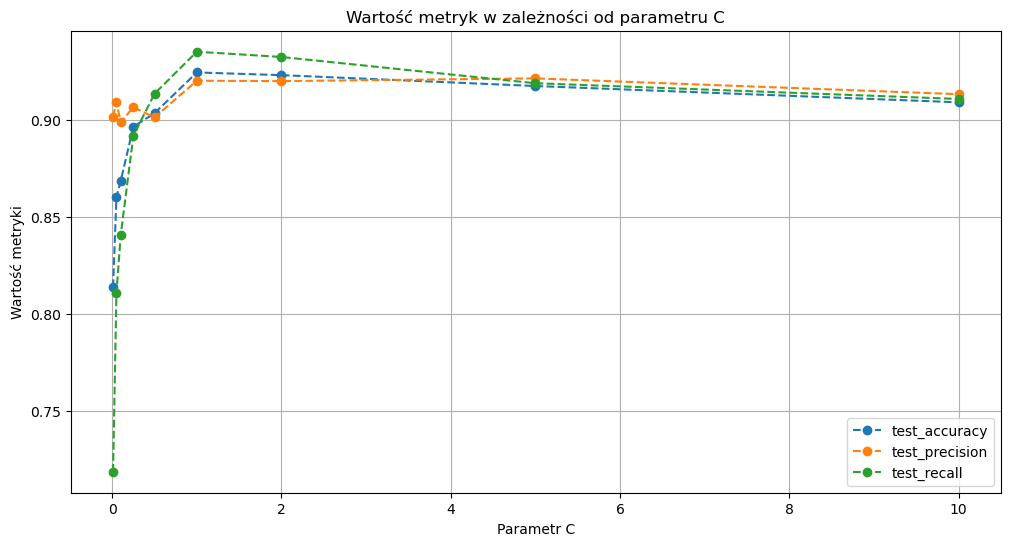

In [348]:
train = ["train_accuracy", "train_precision", "train_recall"]
test = ["test_accuracy", "test_precision", "test_recall"]

fig, ax = plt.subplots(figsize=(12, 6))
for col in train:
    ax.plot(param_grid, df[col], label = col, marker="o", linestyle="--")

ax.legend()
ax.set_title("Wartość metryk w zależności od parametru C")
ax.set_xlabel("Parametr C")
ax.set_ylabel("Wartość metryki")
ax.grid(True)
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))
for col in test:
    ax.plot(df["C"], df[col], label = col, marker="o", linestyle="--")

ax.legend()
ax.set_title("Wartość metryk w zależności od parametru C")
ax.set_xlabel("Parametr C")
ax.set_ylabel("Wartość metryki")
ax.grid(True)
plt.show()

#### Wniosek: Dla C=1, wartość metryki przyjmują najwyższe wartości dla zbioru testowego. Im większa wartość C, tym większe prawdopodobieństwo przeuczenia modelu. Dla zbioru treningowego wartość metryk dąży do 1. 

#### Shrinking

In [352]:
wyniki = []

for shr in [True, False]:
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        model = SVC(C=1, kernel='rbf', shrinking=True, random_state=1)
        model.fit(X_train, y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        wyniki.append({
            'shrinking': shr,
            'train_accuracy': accuracy_score(y_train, y_pred_train),
            'test_accuracy': accuracy_score(y_test, y_pred_test),
            'train_recall': recall_score(y_train, y_pred_train),
            'test_recall': recall_score(y_test, y_pred_test),
            'train_precision': precision_score(y_train, y_pred_train),
            'test_precision': precision_score(y_test, y_pred_test)
        })

df = pd.DataFrame(wyniki)

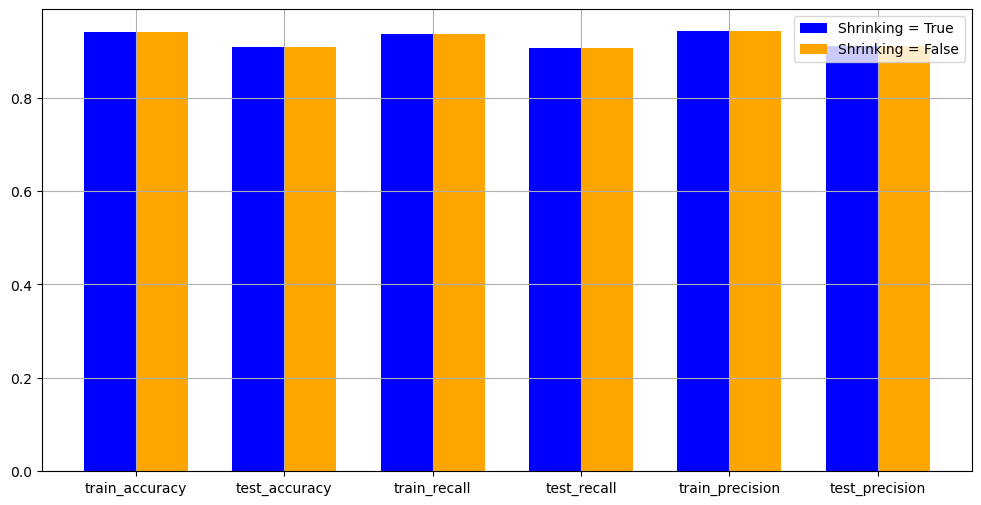

In [355]:
sr_t = df[df['shrinking']==True].mean()[1:]
sr_f = df[df['shrinking']==False].mean()[1:]

x = np.arange(len(df.columns[1:]))  # Pozycje słupków na osi X
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35

ax.bar(x - bar_width / 2, sr_t, width=bar_width, color='blue', label="Shrinking = True")
ax.bar(x + bar_width / 2, sr_f, width=bar_width, color='orange', label="Shrinking = False")
ax.set_xticks(x)
ax.set_xticklabels(df.columns[1:])

ax.legend()
ax.grid(True)

plt.show()

#### Wniosek: Parametr shrinking nic nie zmienia.

#### Gamma

In [360]:
param_grid = range(1, 200, 5)
wyniki = []

for gamma in param_grid:
    model = SVC(C=1, kernel='rbf', gamma = gamma*0.001, random_state=2)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    wyniki.append({
        'gamma': gamma,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test)
    })

df = pd.DataFrame(wyniki)

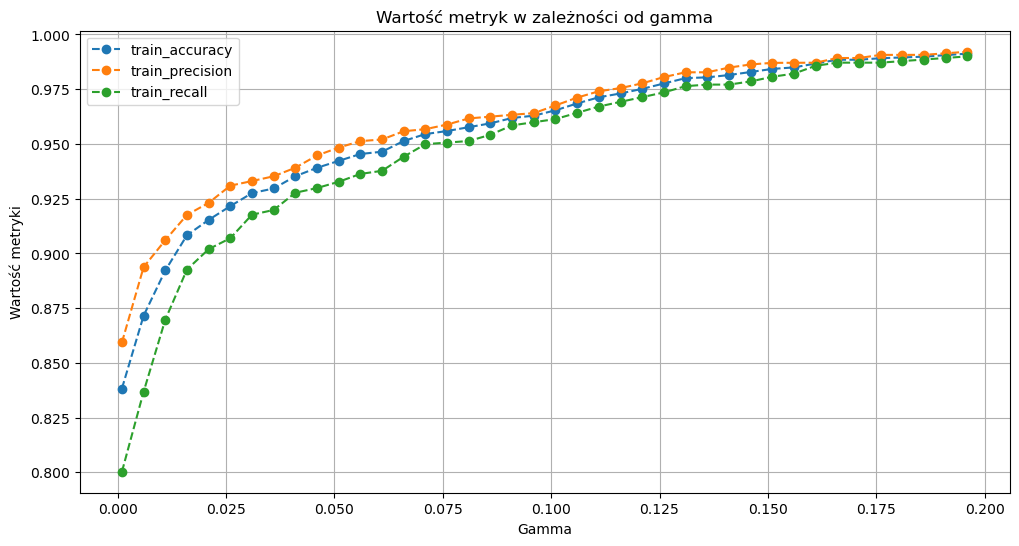

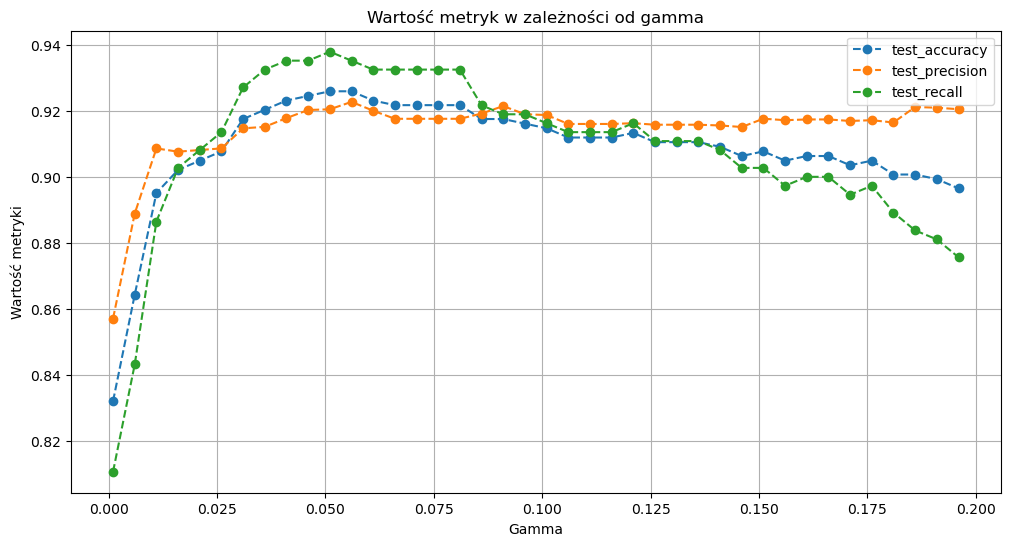

In [362]:
train = ["train_accuracy", "train_precision", "train_recall"]
test = ["test_accuracy", "test_precision", "test_recall"]

param_grid = list(param_grid)

fig, ax = plt.subplots(figsize=(12, 6))
for col in train:
    ax.plot(np.arange(0.001, 0.200, 0.005), df[col], label = col, marker="o", linestyle="--")

ax.legend()
ax.set_title("Wartość metryk w zależności od gamma")
ax.set_xlabel("Gamma")
ax.set_ylabel("Wartość metryki")
ax.grid(True)
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))
for col in test:
    ax.plot(np.arange(0.001, 0.200, 0.005), df[col], label = col, marker="o", linestyle="--")

ax.legend()
ax.set_title("Wartość metryk w zależności od gamma")
ax.set_xlabel("Gamma")
ax.set_ylabel("Wartość metryki")
ax.grid(True)
plt.show()

#### Wniosek: Im większe gamma, tym większe prawdopodobieństwo przeuczenia modelu. Dla **gamma = 0.056**, wartości metryk dla zbioru testowego są najwyższe. Dla zbioru treningowego wartości metryk dążą do 1.

## d) Porównać wyniki uzyskane w powyższych podpunktach. Który model okazał się najlepszy?

#### Na podstawie przeprowadzonych badań, można stwierdzić, że najwyższe wartości metryk dobroci modelu są dla odpowiadających parametrów:
- **jądro liniowe** - C = 0.05
- **jądro wielomianowe** - C = 1, stopień wielomianu = 4, gamma = 0.050
- **jądro radialne** - C = 1, gamma = 0.056

In [390]:
lin_model = SVC(C=0.05, kernel='linear', random_state=1)
lin_model.fit(X_train, y_train)

y_pred_train = lin_model.predict(X_train)
y_pred_test = lin_model.predict(X_test)

wyniki_lin={
    'train_accuracy': accuracy_score(y_train, y_pred_train),
    'test_accuracy': accuracy_score(y_test, y_pred_test),
    'train_recall': recall_score(y_train, y_pred_train),
    'test_recall': recall_score(y_test, y_pred_test),
    'train_precision': precision_score(y_train, y_pred_train),
    'test_precision': precision_score(y_test, y_pred_test)
}

####################################

poly_model = SVC(C=1, kernel = 'poly', degree = 4, gamma = 0.050, random_state=2)
poly_model.fit(X_train, y_train)

y_pred_train = poly_model.predict(X_train)
y_pred_test = poly_model.predict(X_test)

wyniki_poly={
    'train_accuracy': accuracy_score(y_train, y_pred_train),
    'test_accuracy': accuracy_score(y_test, y_pred_test),
    'train_recall': recall_score(y_train, y_pred_train),
    'test_recall': recall_score(y_test, y_pred_test),
    'train_precision': precision_score(y_train, y_pred_train),
    'test_precision': precision_score(y_test, y_pred_test)
}

#####################################

rbf_model = SVC(C=1, kernel = 'rbf', gamma = 0.056, random_state = 2)
rbf_model.fit(X_train, y_train)

y_pred_train = rbf_model.predict(X_train)
y_pred_test = rbf_model.predict(X_test)

wyniki_rbf={
    'train_accuracy': accuracy_score(y_train, y_pred_train),
    'test_accuracy': accuracy_score(y_test, y_pred_test),
    'train_recall': recall_score(y_train, y_pred_train),
    'test_recall': recall_score(y_test, y_pred_test),
    'train_precision': precision_score(y_train, y_pred_train),
    'test_precision': precision_score(y_test, y_pred_test)
}


df_lin = pd.DataFrame([wyniki_lin])
df_poly = pd.DataFrame([wyniki_poly])
df_rbf = pd.DataFrame([wyniki_rbf])

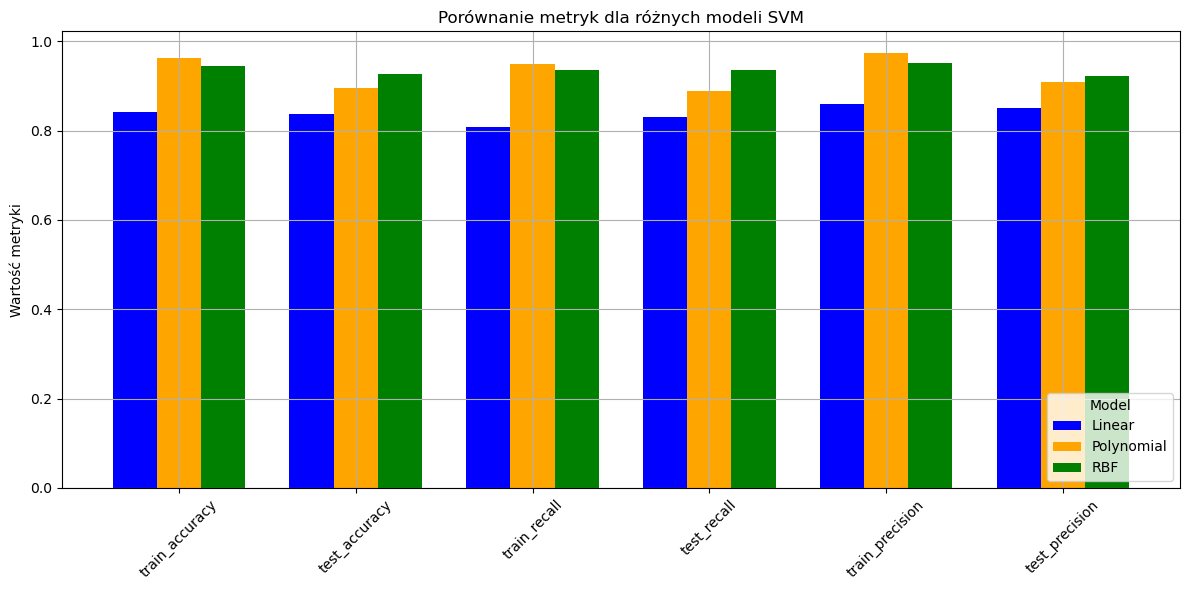

In [436]:
metrics = ['train_accuracy', 'test_accuracy', 'train_recall', 'test_recall', 'train_precision', 'test_precision']
models = ['Linear', 'Polynomial', 'RBF']

values_lin = df_lin.iloc[0][metrics]
values_poly = df_poly.iloc[0][metrics]
values_rbf = df_rbf.iloc[0][metrics]

x = np.arange(len(metrics)) 
bar_width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - bar_width, values_lin, width=bar_width, color='blue', label='Linear')
ax.bar(x, values_poly, width=bar_width, color='orange', label='Polynomial')
ax.bar(x + bar_width, values_rbf, width=bar_width, color='green', label='RBF')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45)
ax.set_title('Porównanie metryk dla różnych modeli SVM')
ax.set_ylabel('Wartość metryki')
ax.legend(title="Model", loc=4)
ax.grid(True)
plt.tight_layout()
plt.show()

#### Wniosek: Ewidentnie najlepsze wyniki uzyskano dla jądra radialnego, ponieważ wartości metryk są najwyższe dla zbioru testowego. Jest to jedyne jądro, dla którego wartości te przekraczają 90%. Z drugiej strony, najgorsze wyniki uzyskano dla liniowego jądra.

## 2. Wykorzystać dowolny prosty model (np. KNN, KKNN lub regresję logistyczną) do predykcji wartości zmiennej wynikowej. Porównać jakość klasyfikacji tego modelu z modelami wykorzystującymi algorytm SVM.

In [412]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

wyniki_reg={
    'train_accuracy': accuracy_score(y_train, y_pred_train),
    'test_accuracy': accuracy_score(y_test, y_pred_test),
    'train_recall': recall_score(y_train, y_pred_train),
    'test_recall': recall_score(y_test, y_pred_test),
    'train_precision': precision_score(y_train, y_pred_train),
    'test_precision': precision_score(y_test, y_pred_test)
}

df_reg = pd.DataFrame([wyniki_reg])

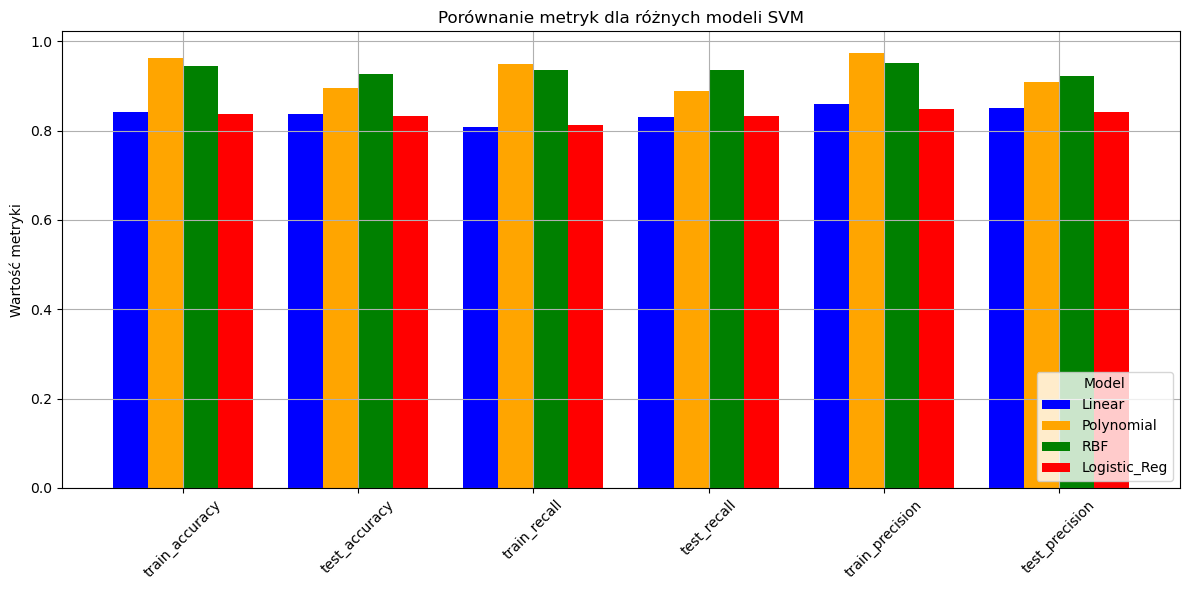

In [434]:
metrics = ['train_accuracy', 'test_accuracy', 'train_recall', 'test_recall', 'train_precision', 'test_precision']
models = ['Linear', 'Polynomial', 'RBF', "Logistic_Reg"]

values_lin = df_lin.iloc[0][metrics]
values_poly = df_poly.iloc[0][metrics]
values_rbf = df_rbf.iloc[0][metrics]
values_reg = df_reg.iloc[0][metrics]

x = np.arange(len(metrics)) 
bar_width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - 1.5*bar_width, values_lin, width=bar_width, color='blue', label='Linear')
ax.bar(x-bar_width/2, values_poly, width=bar_width, color='orange', label='Polynomial')
ax.bar(x + bar_width/2, values_rbf, width=bar_width, color='green', label='RBF')
ax.bar(x + 1.5*bar_width, values_reg, width=bar_width, color='red', label='Logistic_Reg')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45)
ax.set_title('Porównanie metryk dla różnych modeli SVM')
ax.set_ylabel('Wartość metryki')
ax.legend(title="Model", loc=4)
ax.grid(True)
plt.tight_layout()
plt.show()

#### Wniosek: Na tym przykładzie widać, że regresja logistyczna bardzo słabo poradziła sobie na tle metody SVM. Wszystkie wartości mierzące dobroć modelu dla regresji logistycznej, są podobne do tych otrzymanych dla najgorszego jądra.